### Cargamos las librerias necesarias

In [10]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"]=15,10

## Cargamos los datos

In [11]:
url  = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto5/TotalesNacionales.csv"
data = pd.read_csv(url, error_bad_lines=False)
data = data.rename(columns={"Fecha": "Item"}) #Le cambiamos el nombre a la columna
data

,Item,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,...,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11
0,Casos nuevos con sintomas,0.0,2.0,1.0,1.0,2.0,3.0,5.0,2.0,6.0,...,1246,1112,876,1317,893,1343,1183,1004,1406,975
1,Casos totales,1.0,3.0,4.0,5.0,7.0,10.0,15.0,17.0,23.0,...,18435,19663,20643,22016,23048,24581,25972,27219,28866,30063
2,Casos recuperados,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9572,10041,10415,10710,11189,11664,12160,12667,13112,13605
3,Fallecidos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,247,260,270,275,281,285,294,304,312,323
4,Casos activos,1.0,3.0,4.0,5.0,7.0,10.0,15.0,17.0,23.0,...,8616,9362,9958,11031,11578,12632,13518,14248,15442,16135
5,Casos nuevos sin sintomas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,181,116,104,56,139,190,208,243,241,222
6,Casos nuevos totales,0.0,2.0,1.0,1.0,2.0,3.0,5.0,2.0,6.0,...,1427,1228,980,1373,1032,1533,1391,1247,1647,1197


In [12]:
def dia_cambio_metodologia(X,Y):
    plt.text(X, Y, 'Cambio de metodologia')

In [13]:
def labelonbars(X, Y):
    n = len(X)
    for i in range (n):
        number = '{:,}'.format(int(Y[i])).replace(',', '.')
        plt.annotate(
            number, xy=(X[i], Y[i]),
            xytext =(0, 10),
            textcoords="offset points",
            ha ='center', va='bottom')
        
def Graph(name_item):
    data_by_item = data[(data.Item == name_item)].values
    Y            = np.delete(data_by_item, 0)
    X            = data.columns[1:]
    plt.plot(X, Y, 'b')
    plt.plot(X, Y, 'bo')
    labelonbars([X[len(X)-1]], [Y[len(X)-1]])
    #dia_cambio_metodologia('2020-04-29',770)
    plt.xlabel('Fecha')
    plt.ylabel(name_item)
    plt.title(name_item)
    plt.grid()
    plt.xticks(X, rotation='vertical')
    plt.show()

## Casos totales

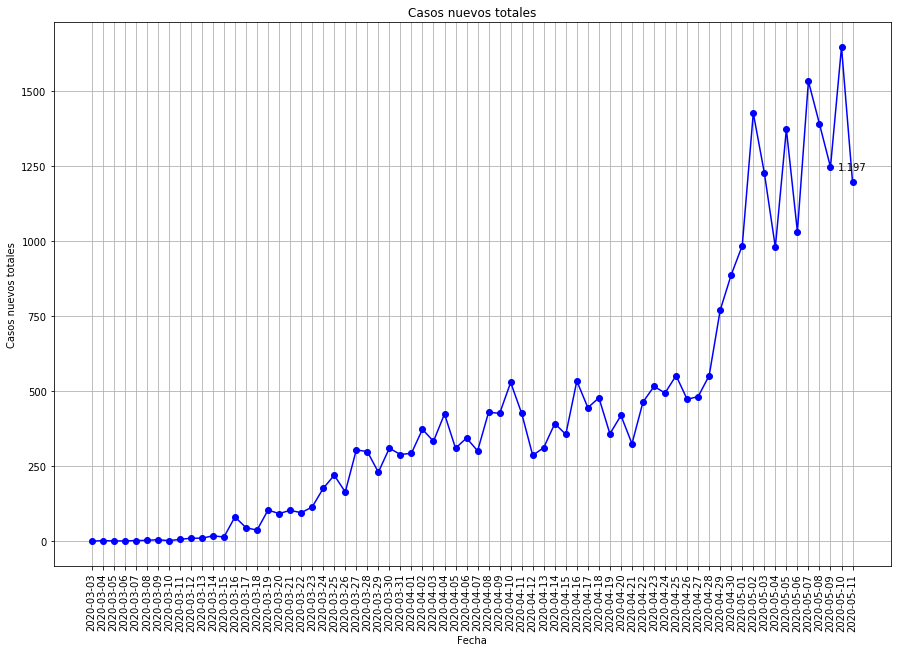

In [14]:
Graph("Casos nuevos totales")

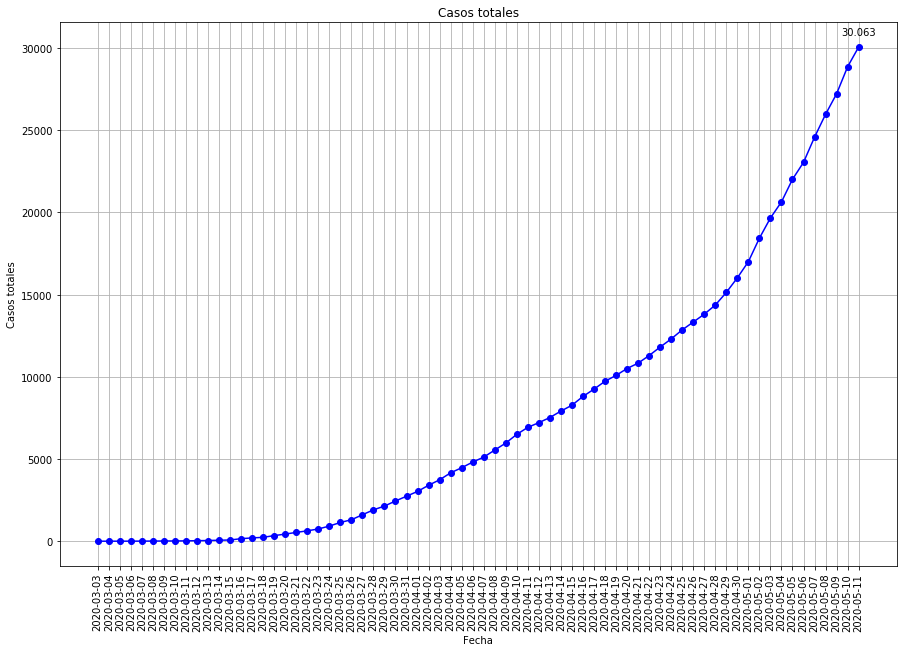

In [15]:
Graph("Casos totales")

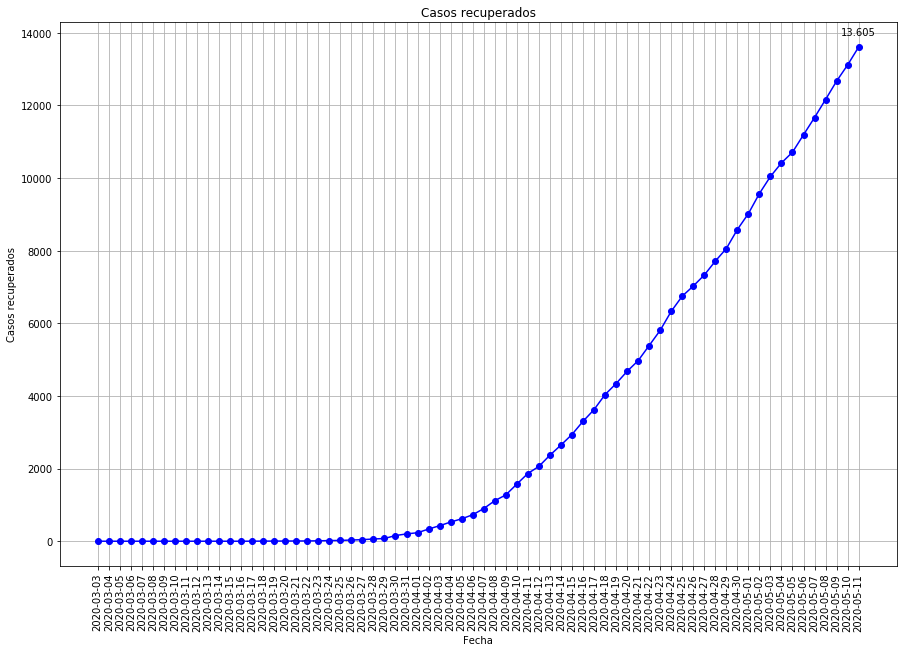

In [16]:
Graph("Casos recuperados")

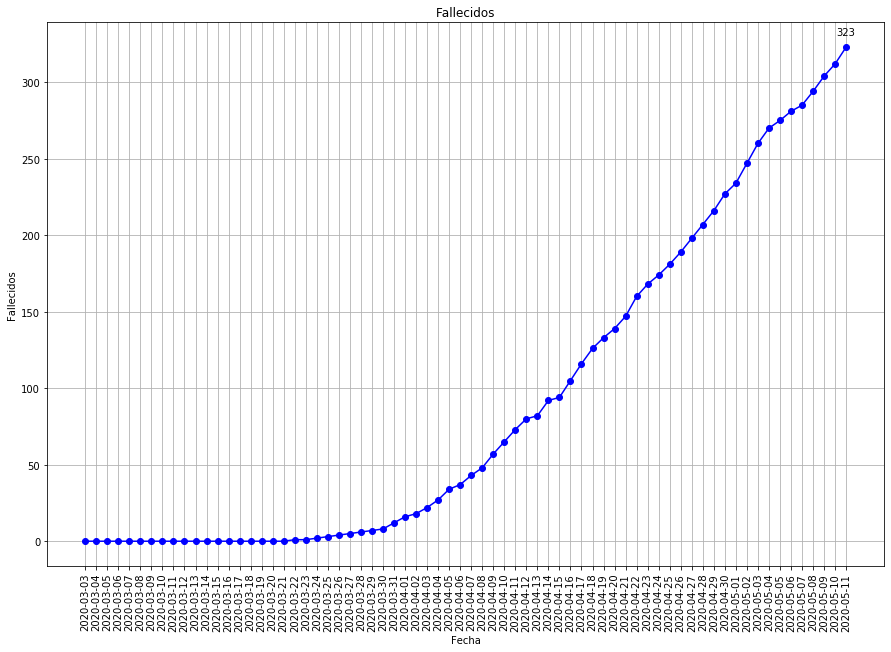

In [17]:
Graph("Fallecidos")

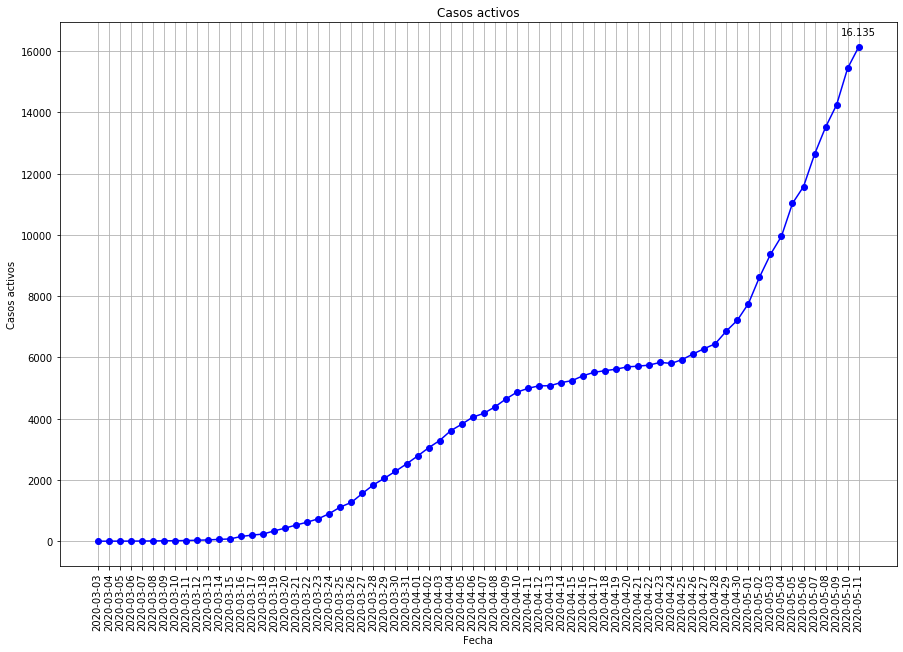

In [18]:
Graph("Casos activos")

## Regresión polinomica casos acumulados

In [19]:
fechas = data.columns[1:]
casos_totales = data[data["Item"]=="Casos totales"].values[0][1:]
dias          = [i for i in range (len(casos_totales))]
df = pd.DataFrame({
    'fecha': fechas,
    'dias': dias,
    'casos totales': casos_totales
})
df.tail(10)

,fecha,dias,casos totales
60,2020-05-02,60,18435
61,2020-05-03,61,19663
62,2020-05-04,62,20643
63,2020-05-05,63,22016
64,2020-05-06,64,23048
65,2020-05-07,65,24581
66,2020-05-08,66,25972
67,2020-05-09,67,27219
68,2020-05-10,68,28866
69,2020-05-11,69,30063


In [20]:
X = df[["dias"]]
Y = df[["casos totales"]]

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [22]:
poly = PolynomialFeatures(degree=8)
X_data = poly.fit_transform(X)

In [23]:
lm = LinearRegression()
lm.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
lm.score(X_data, Y)

0.9998454535764013

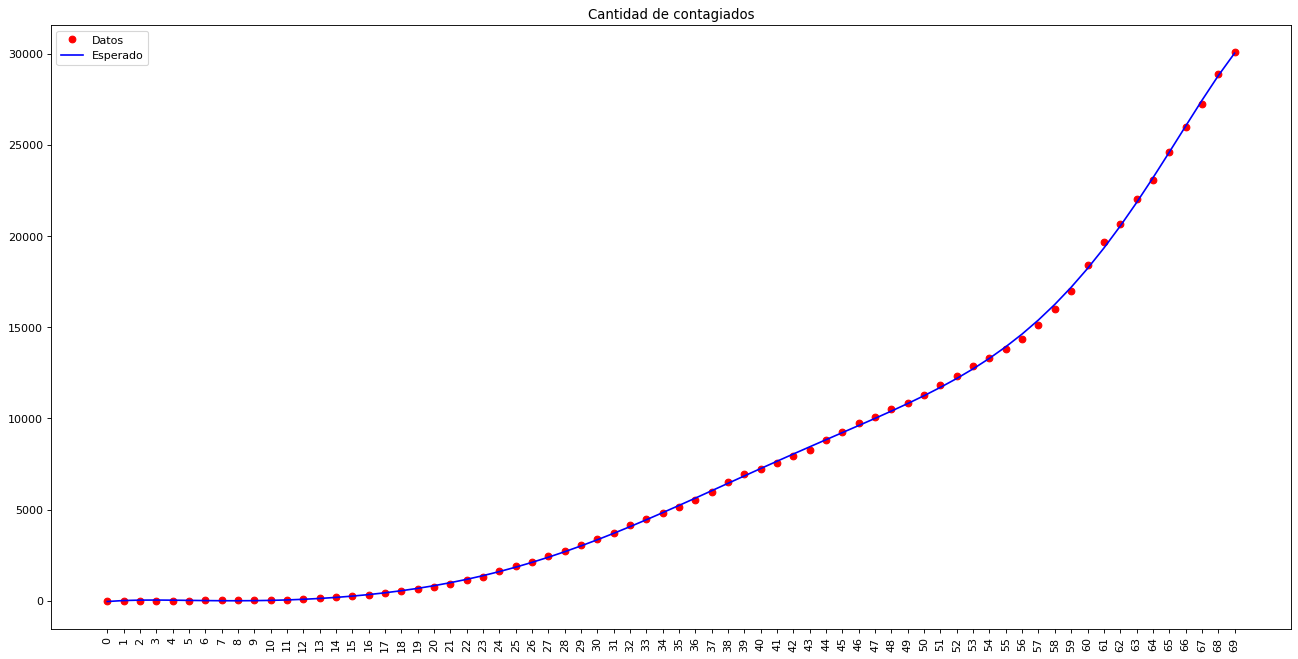

In [25]:
%matplotlib inline
plt.figure(figsize=(20, 10), dpi=80)
plt.subplot(1, 1, 1)
plt.plot(X, Y, "ro")
plt.plot(X, lm.predict(X_data), color="blue")
plt.xticks(X.values.tolist(), rotation='vertical')
plt.legend(["Datos", "Esperado"])
plt.title("Cantidad de contagiados")
plt.show()

In [31]:
predic_ant = 0
for i in range(len(df)-1,len(df)+2):
    prediccion = int(lm.predict(poly.fit_transform([[i]])))
    if i == len(df) - 1:
        print ("Hoy:    " + str(prediccion) + " infectados aprox")
    else:
        nuevos_casos = prediccion - predic_ant
        print ("Día "+ str(i)+ ": " + str(prediccion) + " infectados aprox." + " Nuevos aprox:" + str(nuevos_casos))
    predic_ant = prediccion

Hoy:    30019 infectados aprox
Día 70: 31064 infectados aprox. Nuevos aprox:1045
Día 71: 31827 infectados aprox. Nuevos aprox:763
